In [772]:

# Import jax.numpy and any other library we might need.
import jax.numpy as jnp
import numpyro
import joblib
# Import the relevant modules of the library
from lightweight_mmm import lightweight_mmm
from lightweight_mmm import optimize_media 
from lightweight_mmm import plot
from lightweight_mmm import preprocessing
from lightweight_mmm import utils

import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

## Preparing the data

In [773]:

spend_opps = pd.read_excel('/Users/sahar.seidi/Desktop/MMM Data/datasets/Northeast v3.xlsx')

In [774]:
spend_opps = spend_opps.fillna(0)
spend_opps

Row Labels          FM     Branch  geo  Brand SEM  Connected TV  \
0     2021 FW-01  2021 FM-01  Cleveland    1    4156.35           0.0   
1     2021 FW-02  2021 FM-01  Cleveland    1    3517.35           0.0   
2     2021 FW-03  2021 FM-01  Cleveland    1    3422.10           0.0   
3     2021 FW-04  2021 FM-01  Cleveland    1    3088.40           0.0   
4     2021 FW-05  2021 FM-01  Cleveland    1    4242.43           0.0   
...          ...         ...        ...  ...        ...           ...   
1347  2022 FW-48  2022 FM-11     Albany   13    1247.55           0.0   
1348  2022 FW-49  2022 FM-12     Albany   13    1008.04           0.0   
1349  2022 FW-50  2022 FM-12     Albany   13    1126.00           0.0   
1350  2022 FW-51  2022 FM-12     Albany   13    1151.82           0.0   
1351  2022 FW-52  2022 FM-12     Albany   13     877.29           0.0   

      Direct Mail  Facebook  Facebook/Instagram  Instagram  ...  \
0            0.00    388.11                 0.0        0.0  ...   
1            0.00    692.27                 0.0        0.0  ...   
2            0.00    656.11                 0.0        0.0  ...   
3            0.00    592.57                 0.0        0.0  ...   
4            0.00    582.56                 0.0        0.0  ...   
...           ...       ...                 ...        ...  ...   
1347      4786.14   1143.03                 0.0        0.0  ...   
1348      4779.99    950.05                 0.0        0.0  ...   
1349      4578.78   1163.53                 0.0        0.0  ...   
1350         0.00   1206.37                 0.0        0.0  ...   
1351         0.00   1065.01                 0.0        0.0  ...   

      Other Broad Reach (Connected TV & streaming radio)  Pinterest  \
0                                                   0.0         0.0   
1                                                   0.0         0.0   
2                                                   0.0         0.0   
3                                                   0.0         0.0   
4                                                   0.0         0.0   
...                                                 ...         ...   
1347                                                0.0         0.0   
1348                                                0.0         0.0   
1349                                                0.0         0.0   
1350                                                0.0         0.0   
1351                                                0.0         0.0   

      Programmatic  Programmatic (Display & Video)    Radio  SEM  \
0           266.48                             0.0     0.00  0.0   
1           366.35                             0.0     0.00  0.0   
2           408.57                             0.0     0.00  0.0   
3           408.32                             0.0     0.00  0.0   
4           424.25                             0.0     0.00  0.0   
...            ...                             ...      ...  ...   
1347         49.55                             0.0  2927.11  0.0   
1348         36.48                             0.0  2927.12  0.0   
1349         34.45                             0.0     0.00  0.0   
1350         32.69                             0.0     0.00  0.0   
1351         29.94                             0.0     0.00  0.0   

      Streaming Audio   TV  opps_raw  opps_mkt  
0                0.00  0.0        63        56  
1                0.00  0.0        74        65  
2                0.00  0.0        57        47  
3                0.00  0.0        31        29  
4                0.00  0.0        72        61  
...               ...  ...       ...       ...  
1347          1093.37  0.0        35        33  
1348           846.45  0.0        26        25  
1349             0.00  0.0        31        25  
1350             0.00  0.0        28        26  
1351             0.00  0.0        12        12  

[1352 rows x 28 columns]

In [775]:
spend_opps['fb'] = spend_opps['Facebook'] + spend_opps['Facebook/Instagram'] + spend_opps['Instagram']
spend_opps['non_brand_sem_new'] = spend_opps['Non-Brand SEM'] 
spend_opps['brand_sem_new'] = spend_opps['Brand SEM'] 

spend_opps['new_nurture'] = spend_opps['Nurture Direct Mail'] + spend_opps['Nurture: Direct Mail'] + spend_opps['Nurture Facebook'] + spend_opps['Nurture: Facebook']
spend_opps['prog'] = spend_opps['Programmatic'] + spend_opps['Programmatic (Display & Video)']
spend_opps['other'] = spend_opps['Other Broad Reach (Connected TV & streaming radio)']
spend_opps['fw'] = spend_opps['Row Labels']
spend_opps['broad_reach_new'] = spend_opps['Connected TV'] + spend_opps['Streaming Audio'] + spend_opps['other'] 

In [776]:
spend_opps_new = spend_opps.drop(['Magazines','Pinterest','LinkedIn','Facebook', 'Facebook/Instagram', 'Instagram','Non-Brand SEM', 'Brand SEM', 'SEM','Nurture Direct Mail'
                ,'Nurture: Direct Mail','Programmatic','Programmatic (Display & Video)','Other Broad Reach (Connected TV & streaming radio)',
                                  'Nurture Facebook','Row Labels','Nurture: Facebook','Connected TV','Streaming Audio','other',
                                 'Newspaper'],axis =1 )

In [777]:
spend_opps_new 

FM     Branch  geo  Direct Mail    Radio   TV  opps_raw  \
0     2021 FM-01  Cleveland    1         0.00     0.00  0.0        63   
1     2021 FM-01  Cleveland    1         0.00     0.00  0.0        74   
2     2021 FM-01  Cleveland    1         0.00     0.00  0.0        57   
3     2021 FM-01  Cleveland    1         0.00     0.00  0.0        31   
4     2021 FM-01  Cleveland    1         0.00     0.00  0.0        72   
...          ...        ...  ...          ...      ...  ...       ...   
1347  2022 FM-11     Albany   13      4786.14  2927.11  0.0        35   
1348  2022 FM-12     Albany   13      4779.99  2927.12  0.0        26   
1349  2022 FM-12     Albany   13      4578.78     0.00  0.0        31   
1350  2022 FM-12     Albany   13         0.00     0.00  0.0        28   
1351  2022 FM-12     Albany   13         0.00     0.00  0.0        12   

      opps_mkt       fb  non_brand_sem_new  brand_sem_new  new_nurture  \
0           56   388.11            1571.01        4156.35         0.00   
1           65   692.27            1542.81        3517.35         0.00   
2           47   656.11            1510.69        3422.10         0.00   
3           29   592.57            1129.18        3088.40         0.00   
4           61   582.56            1311.38        4242.43         0.00   
...        ...      ...                ...            ...          ...   
1347        33  1143.03            1558.29        1247.55       209.41   
1348        25   950.05            1238.87        1008.04       255.22   
1349        25  1163.53            1283.32        1126.00       177.91   
1350        26  1206.37            1219.82        1151.82        34.32   
1351        12  1065.01            1092.64         877.29        31.90   

        prog          fw  broad_reach_new  
0     266.48  2021 FW-01             0.00  
1     366.35  2021 FW-02             0.00  
2     408.57  2021 FW-03             0.00  
3     408.32  2021 FW-04             0.00  
4     424.25  2021 FW-05             0.00  
...      ...         ...              ...  
1347   49.55  2022 FW-48          1093.37  
1348   36.48  2022 FW-49           846.45  
1349   34.45  2022 FW-50             0.00  
1350   32.69  2022 FW-51             0.00  
1351   29.94  2022 FW-52             0.00  

[1352 rows x 15 columns]

In [781]:
# holiday_1 =pd.read_excel('/Users/sahar.seidi/Desktop/ MMM Data/datasets/holidays.xlsx')
# holiday = holiday_1.fillna(0)
# hldy = holiday.drop(['Canadian Holidays','fw'],axis =1 )
# hldy_cols = pd.get_dummies(hldy)
# hldy_cols

In [779]:
# covid_data = pd.read_excel('/Users/sahar.seidi/Desktop/ Data/covid.xlsx')
# covid_cols = covid_data.drop(['fw'],axis =1 )
# covid_cols


In [782]:
# macro_data = pd.read_excel('/Users/sahar.seidi/Desktop/ MMM Data/datasets/macro.xlsx')
# macro_cols = macro_data.drop(['fw'],axis =1 )
# macro_cols

In [783]:
organic_data = pd.read_excel('/Users/sahar.seidi/Desktop/ MMM Data/datasets/Organic data v3.xlsx')
organic_cols_1 = organic_data.drop(['Row Labels','Branch','(Other)','Email'],axis =1 )
organic_cols = organic_cols_1.fillna(0)
organic_cols

Direct  Organic Search  Referral  Social
0       79.0             513      32.0   639.0
1       32.0             702      16.0   458.0
2      174.0             828      16.0   481.0
3       55.0             615       0.0   426.0
4       71.0             884       0.0   702.0
...      ...             ...       ...     ...
1347    57.0             120       0.0    21.0
1348     7.0             106       0.0    71.0
1349    14.0             155       0.0   127.0
1350    14.0              92       0.0    64.0
1351    42.0             148       0.0    78.0

[1352 rows x 4 columns]

In [784]:
df2 = spend_opps_new['FM']
seas_cols = pd.get_dummies(df2)

control_vars_1 =  organic_cols 
#control_vars_1 = pd.concat([seas_cols,organic_cols,hldy_cols,macro_cols],axis =1)
control_vars = control_vars_1.fillna(0)
opps_cols =spend_opps_new['opps_mkt']

mdsp_cols = spend_opps_new.drop(['fw','FM','opps_mkt','opps_raw','Branch'],axis =1)
#mdsp_cols = pd.concat([mdsp_cols_1,organic_cols],axis = 1)

In [785]:
opps_cols[opps_cols==0]=0.0001

/var/folders/5c/twnjfkgd6y135lwygqk13cc00000gt/T/ipykernel_76273/2783365854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opps_cols[opps_cols==0]=0.0001


In [786]:
opps_cols

0       56.0
1       65.0
2       47.0
3       29.0
4       61.0
        ... 
1347    33.0
1348    25.0
1349    25.0
1350    26.0
1351    12.0
Name: opps_mkt, Length: 1352, dtype: float64

In [787]:
mdsp_cols

geo  Direct Mail    Radio   TV       fb  non_brand_sem_new  \
0       1         0.00     0.00  0.0   388.11            1571.01   
1       1         0.00     0.00  0.0   692.27            1542.81   
2       1         0.00     0.00  0.0   656.11            1510.69   
3       1         0.00     0.00  0.0   592.57            1129.18   
4       1         0.00     0.00  0.0   582.56            1311.38   
...   ...          ...      ...  ...      ...                ...   
1347   13      4786.14  2927.11  0.0  1143.03            1558.29   
1348   13      4779.99  2927.12  0.0   950.05            1238.87   
1349   13      4578.78     0.00  0.0  1163.53            1283.32   
1350   13         0.00     0.00  0.0  1206.37            1219.82   
1351   13         0.00     0.00  0.0  1065.01            1092.64   

      brand_sem_new  new_nurture    prog  broad_reach_new  
0           4156.35         0.00  266.48             0.00  
1           3517.35         0.00  366.35             0.00  
2           3422.10         0.00  408.57             0.00  
3           3088.40         0.00  408.32             0.00  
4           4242.43         0.00  424.25             0.00  
...             ...          ...     ...              ...  
1347        1247.55       209.41   49.55          1093.37  
1348        1008.04       255.22   36.48           846.45  
1349        1126.00       177.91   34.45             0.00  
1350        1151.82        34.32   32.69             0.00  
1351         877.29        31.90   29.94             0.00  

[1352 rows x 10 columns]

In [788]:
control_vars

Direct  Organic Search  Referral  Social
0       79.0             513      32.0   639.0
1       32.0             702      16.0   458.0
2      174.0             828      16.0   481.0
3       55.0             615       0.0   426.0
4       71.0             884       0.0   702.0
...      ...             ...       ...     ...
1347    57.0             120       0.0    21.0
1348     7.0             106       0.0    71.0
1349    14.0             155       0.0   127.0
1350    14.0              92       0.0    64.0
1351    42.0             148       0.0    78.0

[1352 rows x 4 columns]

In [789]:
ch_names = ['Direct Mail',
            'Radio','TV','fb','non_brand_sem_new','brand_sem_new','new_nurture','prog','broad_reach_new']
           
           

In [790]:
mdsp_cols[mdsp_cols==0]=0.0001
mdsp_cols

geo  Direct Mail      Radio      TV       fb  non_brand_sem_new  \
0       1       0.0001     0.0001  0.0001   388.11            1571.01   
1       1       0.0001     0.0001  0.0001   692.27            1542.81   
2       1       0.0001     0.0001  0.0001   656.11            1510.69   
3       1       0.0001     0.0001  0.0001   592.57            1129.18   
4       1       0.0001     0.0001  0.0001   582.56            1311.38   
...   ...          ...        ...     ...      ...                ...   
1347   13    4786.1400  2927.1100  0.0001  1143.03            1558.29   
1348   13    4779.9900  2927.1200  0.0001   950.05            1238.87   
1349   13    4578.7800     0.0001  0.0001  1163.53            1283.32   
1350   13       0.0001     0.0001  0.0001  1206.37            1219.82   
1351   13       0.0001     0.0001  0.0001  1065.01            1092.64   

      brand_sem_new  new_nurture    prog  broad_reach_new  
0           4156.35       0.0001  266.48           0.0001  
1           3517.35       0.0001  366.35           0.0001  
2           3422.10       0.0001  408.57           0.0001  
3           3088.40       0.0001  408.32           0.0001  
4           4242.43       0.0001  424.25           0.0001  
...             ...          ...     ...              ...  
1347        1247.55     209.4100   49.55        1093.3700  
1348        1008.04     255.2200   36.48         846.4500  
1349        1126.00     177.9100   34.45           0.0001  
1350        1151.82      34.3200   32.69           0.0001  
1351         877.29      31.9000   29.94           0.0001  

[1352 rows x 10 columns]

In [791]:
control_vars[control_vars==0]=0.0001

control_vars

Direct  Organic Search  Referral  Social
0       79.0             513   32.0000   639.0
1       32.0             702   16.0000   458.0
2      174.0             828   16.0000   481.0
3       55.0             615    0.0001   426.0
4       71.0             884    0.0001   702.0
...      ...             ...       ...     ...
1347    57.0             120    0.0001    21.0
1348     7.0             106    0.0001    71.0
1349    14.0             155    0.0001   127.0
1350    14.0              92    0.0001    64.0
1351    42.0             148    0.0001    78.0

[1352 rows x 4 columns]

In [792]:
# seas_cols[seas_cols==0]=0.0001

# seas_cols

In [793]:
df_main = pd.concat([spend_opps_new['fw'],opps_cols,mdsp_cols,control_vars], axis =1)
df_main

fw  opps_mkt  geo  Direct Mail      Radio      TV       fb  \
0     2021 FW-01      56.0    1       0.0001     0.0001  0.0001   388.11   
1     2021 FW-02      65.0    1       0.0001     0.0001  0.0001   692.27   
2     2021 FW-03      47.0    1       0.0001     0.0001  0.0001   656.11   
3     2021 FW-04      29.0    1       0.0001     0.0001  0.0001   592.57   
4     2021 FW-05      61.0    1       0.0001     0.0001  0.0001   582.56   
...          ...       ...  ...          ...        ...     ...      ...   
1347  2022 FW-48      33.0   13    4786.1400  2927.1100  0.0001  1143.03   
1348  2022 FW-49      25.0   13    4779.9900  2927.1200  0.0001   950.05   
1349  2022 FW-50      25.0   13    4578.7800     0.0001  0.0001  1163.53   
1350  2022 FW-51      26.0   13       0.0001     0.0001  0.0001  1206.37   
1351  2022 FW-52      12.0   13       0.0001     0.0001  0.0001  1065.01   

      non_brand_sem_new  brand_sem_new  new_nurture    prog  broad_reach_new  \
0               1571.01        4156.35       0.0001  266.48           0.0001   
1               1542.81        3517.35       0.0001  366.35           0.0001   
2               1510.69        3422.10       0.0001  408.57           0.0001   
3               1129.18        3088.40       0.0001  408.32           0.0001   
4               1311.38        4242.43       0.0001  424.25           0.0001   
...                 ...            ...          ...     ...              ...   
1347            1558.29        1247.55     209.4100   49.55        1093.3700   
1348            1238.87        1008.04     255.2200   36.48         846.4500   
1349            1283.32        1126.00     177.9100   34.45           0.0001   
1350            1219.82        1151.82      34.3200   32.69           0.0001   
1351            1092.64         877.29      31.9000   29.94           0.0001   

      Direct  Organic Search  Referral  Social  
0       79.0             513   32.0000   639.0  
1       32.0             702   16.0000   458.0  
2      174.0             828   16.0000   481.0  
3       55.0             615    0.0001   426.0  
4       71.0             884    0.0001   702.0  
...      ...             ...       ...     ...  
1347    57.0             120    0.0001    21.0  
1348     7.0             106    0.0001    71.0  
1349    14.0             155    0.0001   127.0  
1350    14.0              92    0.0001    64.0  
1351    42.0             148    0.0001    78.0  

[1352 rows x 16 columns]

In [794]:
ext_features = list(control_vars)
ext_features

['Direct', 'Organic Search', 'Referral', 'Social']

In [795]:
mdsp_cols_1 = mdsp_cols.drop(['geo'],axis =1)
med_features = list(mdsp_cols_1)
med_features 

['Direct Mail',
 'Radio',
 'TV',
 'fb',
 'non_brand_sem_new',
 'brand_sem_new',
 'new_nurture',
 'prog',
 'broad_reach_new']

In [796]:
media_data, extra_features,target,costs = lightweight_mmm.utils.dataframe_to_jax(dataframe = df_main,
                                                                                 media_features = med_features,
                                                                                 extra_features = ext_features,
                                                                                 date_feature = 'fw',
                                                                                 target = 'opps_mkt',
                                                                                 geo_feature = 'geo',
                                                                                 cost_features = med_features)

In [797]:
SEED = 105

data_size = 104
n_media_channels = 9
n_extra_features = 4
n_geos = 13





In [798]:
# Scale
media_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
extra_features_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
target_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
cost_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean, multiply_by=0.15)

joblib.dump(media_scaler, 'media_scaler.gz')
media_scaler = joblib.load('media_scaler.gz')

joblib.dump(extra_features_scaler, 'extra_features_scaler.gz')
extra_features_scaler = joblib.load('extra_features_scaler.gz')

joblib.dump(target_scaler, 'target_scaler.gz')
target_scaler = joblib.load('target_scaler.gz')

joblib.dump(cost_scaler, 'cost_scaler.gz')
cost_scaler = joblib.load('cost_scaler.gz')

In [799]:
media_data_transformed = media_scaler.fit_transform(media_data)
target_data_transformed = target_scaler.fit_transform(target)
cost_data_transformed = cost_scaler.fit_transform(costs)
extra_features_data_transformed = extra_features_scaler.fit_transform(extra_features)

In [800]:
# Split 
test_data_period_size = 24
split_point = data_size - test_data_period_size

# Media data
media_data_train = media_data_transformed[:split_point, ...]
media_data_test = media_data_transformed[split_point:, ...]

# Extra features
extra_features_train = extra_features_data_transformed[:split_point, ...]
extra_features_test = extra_features_data_transformed[split_point:, ...]

# Target
target_train = target_data_transformed[:split_point,...]
target_test = target_data_transformed[split_point:,...]

# Cost
cost_train = cost_data_transformed[:split_point, ...]
cost_test = cost_data_transformed[split_point:, ...]

In [801]:
branch_names = ['Cleveland','Columbus','Philadelphia','Harrisburg','Pittsburg','Hartford',
            'Long Island','Fall River','Buffalo_Rochester','NNJ_SNJ','Syracuse','Scranton','Albany']


In [802]:
# Checks
correlations, variances, spend_fractions, variance_inflation_factors = preprocessing.check_data_quality(
    media_data_transformed,
    target_data_transformed,
    cost_data_transformed,
    extra_features_data_transformed,
    channel_names = ch_names,
    geo_names = branch_names)


## Correlation Check for each geo

In [803]:

from IPython.display import display

for i, corr_matrix in enumerate(correlations):
 display(f"geo {i}")
 display(corr_matrix.style.background_gradient(cmap='RdBu', vmin=-1, vmax=1).set_precision(3))
 display("--------------------------------------------------------------------")
     

'geo 0'

/var/folders/5c/twnjfkgd6y135lwygqk13cc00000gt/T/ipykernel_76273/3424129562.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  display(corr_matrix.style.background_gradient(cmap='RdBu', vmin=-1, vmax=1).set_precision(3))


'--------------------------------------------------------------------'

'geo 1'

'--------------------------------------------------------------------'

'geo 2'

'--------------------------------------------------------------------'

'geo 3'

'--------------------------------------------------------------------'

'geo 4'

'--------------------------------------------------------------------'

'geo 5'

'--------------------------------------------------------------------'

'geo 6'

'--------------------------------------------------------------------'

'geo 7'

'--------------------------------------------------------------------'

'geo 8'

'--------------------------------------------------------------------'

'geo 9'

'--------------------------------------------------------------------'

'geo 10'

'--------------------------------------------------------------------'

'geo 11'

'--------------------------------------------------------------------'

'geo 12'

'--------------------------------------------------------------------'

In [804]:
def highlight_variances(x: float, 
                        low_variance_threshold: float=1.0e-3, 
                        high_variance_threshold: float=3.0) -> str:

    if x < low_variance_threshold or x > high_variance_threshold:
      weight = 'bold'
      color = 'red'
    else:
      weight = 'normal'
      color = 'black'
    style = f'font-weight: {weight}; color: {color}'
    return style

variances.style.set_precision(4).applymap(highlight_variances)

/var/folders/5c/twnjfkgd6y135lwygqk13cc00000gt/T/ipykernel_76273/2378638667.py:14: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  variances.style.set_precision(4).applymap(highlight_variances)


In [805]:
def highlight_low_spend_fractions(x: float,
                                  low_spend_threshold: float=0.01) -> str:
    if x < low_spend_threshold:
      weight = 'bold'
      color = 'red'
    else:
      weight = 'normal'
      color = 'black'
    style = f'font-weight: {weight}; color: {color}'
    return style

spend_fractions.style.set_precision(4).applymap(highlight_low_spend_fractions)

/var/folders/5c/twnjfkgd6y135lwygqk13cc00000gt/T/ipykernel_76273/3904532266.py:12: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  spend_fractions.style.set_precision(4).applymap(highlight_low_spend_fractions)


In [806]:
def highlight_high_vif_values(x: float,
                              high_vif_threshold: float=7.0) -> str:
    if x > high_vif_threshold:
      weight = 'bold'
      color = 'red'
    else:
      weight = 'normal'
      color = 'black'
    style = f'font-weight: {weight}; color: {color}'
    return style

variance_inflation_factors.style.set_precision(4).applymap(highlight_high_vif_values)

/var/folders/5c/twnjfkgd6y135lwygqk13cc00000gt/T/ipykernel_76273/989821432.py:12: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  variance_inflation_factors.style.set_precision(4).applymap(highlight_high_vif_values)


## Hyperparameter Tuning

In [839]:
from sklearn.metrics import mean_absolute_percentage_error

adstock_models = ["adstock", "hill_adstock","carryover"]
degrees_season = [1,2,3]


for model_name in adstock_models:
 for degrees in degrees_season:
    mmm = lightweight_mmm.LightweightMMM(model_name=model_name)
    mmm.fit(media=media_data_train,
            media_prior=cost_train,
            target=target_train,
            extra_features=extra_features_train,
            number_warmup=1000,
            number_samples=1000,
            number_chains=1,
            degrees_seasonality=degrees,
            weekday_seasonality=True,
            seasonality_frequency=365,
            seed=1)
    
    prediction = mmm.predict(
    media=media_data_test,
    extra_features=extra_features_test,
    target_scaler=target_scaler)
    p = prediction.mean(axis=0)

    mape = mean_absolute_percentage_error(target_test, p)
    print(f"model_name={model_name} degrees={degrees} MAPE={mape} samples={p[:3]}")

sample: 100%|█| 2000/2000 [02:32<00:00, 13.08it/s, 127 steps of size 2.80e-02. a


model_name=adstock degrees=1 MAPE=67.64269256591797 samples=[[ 29.298098  126.0007     54.119354  105.22263    23.157003   59.22165
    0.7404385 160.99454    60.702168   56.77645    66.76945    24.914616
  205.4634   ]
 [ 22.240543  149.43114   116.72028    76.36778    71.11092    52.792175
   40.681713   16.940826   16.867205  122.84224    48.931267   75.61124
  213.1922   ]
 [162.67686   110.59934    66.78737    21.312328   47.16489    73.714485
   65.3653    190.4156     12.588754   47.689106  103.82691    28.1729
   42.392464 ]]


sample: 100%|█| 2000/2000 [03:03<00:00, 10.88it/s, 255 steps of size 1.73e-02. a


model_name=adstock degrees=2 MAPE=61.71336364746094 samples=[[ 18.400694  123.11002    52.745018   98.39469    21.6346     57.46629
   -1.8736225 159.81396    52.607937   54.1568     64.55199    21.326824
  202.18015  ]
 [ 11.326522  147.26645   114.98968    69.41401    69.70788    51.95572
   37.699596   14.849905    9.233423  120.1267     45.83242    72.56711
  210.19354  ]
 [158.77818   107.860466   64.83665    15.030373   45.98129    72.20465
   61.678673  188.83163     5.80199    43.777493  100.15783    24.368376
   37.026745 ]]


sample: 100%|█| 2000/2000 [04:17<00:00,  7.77it/s, 255 steps of size 1.31e-02. a


model_name=adstock degrees=3 MAPE=60.683616638183594 samples=[[ 17.64474   122.63605    52.37145    99.082245   21.548925   57.94267
   -2.1121807 159.1839     52.069286   53.630226   64.145195   20.639431
  202.368    ]
 [ 10.450429  146.81165   114.387085   69.9851     69.517746   51.68376
   37.571514   14.269267    8.781013  119.827515   45.72919    71.91268
  210.47397  ]
 [157.19583   107.29032    64.24716    15.299687   45.570232   72.088486
   61.23622   188.01894     5.015507   43.786224   99.62434    23.597061
   36.631653 ]]


sample: 100%|█| 2000/2000 [00:33<00:00, 58.90it/s, 6 steps of size 2.03e-02. acc


model_name=hill_adstock degrees=1 MAPE=59.12839126586914 samples=[[ 17.98484  139.72617   56.972164  97.55667   18.176445  49.267868
    6.536926 156.22083   54.57729   47.41066   68.19413   16.148127
  183.49811 ]
 [  9.259024 161.39507  115.803375  59.511726  58.877365  49.496075
   31.188513  17.002625   9.887255 122.16432   44.550873  68.63748
  180.06395 ]
 [129.63075  116.97807   63.122326  10.079546  46.58972   71.10134
   53.578377 161.29361   10.559341  34.25801   90.05699   20.528305
   40.113033]]


sample: 100%|█| 2000/2000 [00:35<00:00, 56.96it/s, 21 steps of size 2.32e-02. ac


model_name=hill_adstock degrees=2 MAPE=68.98176574707031 samples=[[ 14.67585   136.32336    53.978336   92.01969    20.418118   48.975357
    5.9225473 159.03484    50.37044    46.777225   67.38787    17.5947
  185.20648  ]
 [  6.7477145 160.76147   125.94185    58.052685   61.701504   46.908897
   32.456882   16.238157   10.400751  121.49284    46.20238    68.60571
  182.64304  ]
 [145.10861   114.986755   64.71714    13.969966   44.68226    71.321396
   55.92175   169.84225    11.591335   35.633465   97.7626     19.652452
   35.581203 ]]


sample: 100%|█| 2000/2000 [00:49<00:00, 40.13it/s, 12 steps of size 1.45e-02. ac


model_name=hill_adstock degrees=3 MAPE=60.489017486572266 samples=[[ 14.564318  137.3433     58.693092   96.71884    19.438889   48.119232
    6.7441263 162.29088    50.232395   46.04743    64.180756   16.61654
  189.12851  ]
 [  5.3712177 158.43039   124.77969    59.97394    58.207836   47.56516
   31.607052   19.037905    9.83463   120.94127    45.33877    69.08347
  188.97368  ]
 [146.38326   116.50242    64.95351    13.833587   46.4622     69.93434
   54.04126   169.0856     10.988584   33.84101    96.66749    19.232988
   36.537106 ]]


sample: 100%|█| 2000/2000 [09:29<00:00,  3.51it/s, 127 steps of size 2.76e-02. a


model_name=carryover degrees=1 MAPE=65.49515533447266 samples=[[ 26.56748  124.11033   55.34363  101.81264   22.338633  58.10314
   -1.064627 159.19249   60.326     54.457626  65.501724  22.337355
  205.29218 ]
 [ 20.202469 148.67793  116.53494   73.731346  70.8865    50.87866
   39.861156  13.237423  16.3535   122.19217   48.38405   74.096
  212.873   ]
 [158.45888  107.20857   66.6637    18.768251  46.276413  72.053635
   64.10463  187.7657    11.940188  47.001186 103.15543   26.277596
   39.446217]]


sample: 100%|█| 2000/2000 [11:39<00:00,  2.86it/s, 255 steps of size 2.17e-02. a


model_name=carryover degrees=2 MAPE=58.65321731567383 samples=[[ 14.954919  122.06605    54.351463   94.69599    20.749352   56.650967
   -4.3256984 155.31973    50.159485   51.547035   61.72387    18.574007
  200.85617  ]
 [  7.9429135 145.69008   114.21761    65.83892    69.1086     49.633865
   36.425972    9.475011    5.6854563 118.98309    43.59343    70.82377
  208.87146  ]
 [153.74013   104.42933    64.67748    11.298754   44.250023   70.01355
   60.208958  184.13089     2.0573654  42.817932   98.4724     21.962059
   31.611431 ]]


sample: 100%|█| 2000/2000 [13:23<00:00,  2.49it/s, 255 steps of size 1.60e-02. a


model_name=carryover degrees=3 MAPE=58.42103576660156 samples=[[ 14.62208   121.69787    54.03245    94.42248    20.53277    56.29923
   -4.629215  154.1817     50.187496   51.5141     61.50516    17.979193
  199.34692  ]
 [  7.7565756 145.54922   113.70671    65.80027    69.19674    49.490494
   36.201424    9.212607    5.8685756 118.514336   43.194523   70.62975
  207.64261  ]
 [153.3491    104.175766   64.63174    11.329888   43.968605   70.0858
   59.746986  183.43088     2.031116   42.576378   98.168755   21.529278
   31.253239 ]]


In [840]:
mmm = lightweight_mmm.LightweightMMM(model_name="carryover")

In [841]:
number_warmup=1000
number_samples=1000

In [842]:
mmm.fit(
    media=media_data_train,
    media_prior=cost_train,
    target=target_train,
    extra_features=extra_features_train,
    number_warmup=number_warmup,
    number_samples=number_samples,
    degrees_seasonality = 3,
    seed=SEED)

/Users/sahar.seidi/opt/anaconda3/lib/python3.9/site-packages/lightweight_mmm/lightweight_mmm.py:357: UserWarning: There are not enough devices to run parallel chains: expected 2 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(2)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = numpyro.infer.MCMC(
sample: 100%|█| 2000/2000 [06:03<00:00,  5.51it/s, 255 steps of size 4.75e-02. a
sample: 100%|█| 2000/2000 [05:51<00:00,  5.68it/s, 63 steps of size 4.94e-02. ac


In [845]:
# joblib.dump(mmm, 'mmm.gz')
# mmm = joblib.load('mmm.gz')

In [843]:
mmm.print_summary()


                                 mean       std    median      5.0%     95.0%     n_eff     r_hat
ad_effect_retention_rate[0]      0.03      0.03      0.02      0.00      0.07   2322.47      1.00
ad_effect_retention_rate[1]      0.05      0.05      0.04      0.00      0.12   1706.87      1.00
ad_effect_retention_rate[2]      0.59      0.28      0.63      0.16      1.00    771.70      1.00
ad_effect_retention_rate[3]      0.50      0.29      0.50      0.04      0.93   2286.18      1.00
ad_effect_retention_rate[4]      0.03      0.03      0.02      0.00      0.07   1974.26      1.00
ad_effect_retention_rate[5]      0.01      0.01      0.01      0.00      0.03   2362.91      1.00
ad_effect_retention_rate[6]      0.03      0.03      0.02      0.00      0.07   2043.11      1.00
ad_effect_retention_rate[7]      0.53      0.30      0.53      0.11      1.00   2267.73      1.00
ad_effect_retention_rate[8]      0.52      0.29      0.51      0.12      1.00   2339.59      1.00
    channel_coef_me

## We can visualise the posterior distributions of the media effects, one for each channel-geo combination.

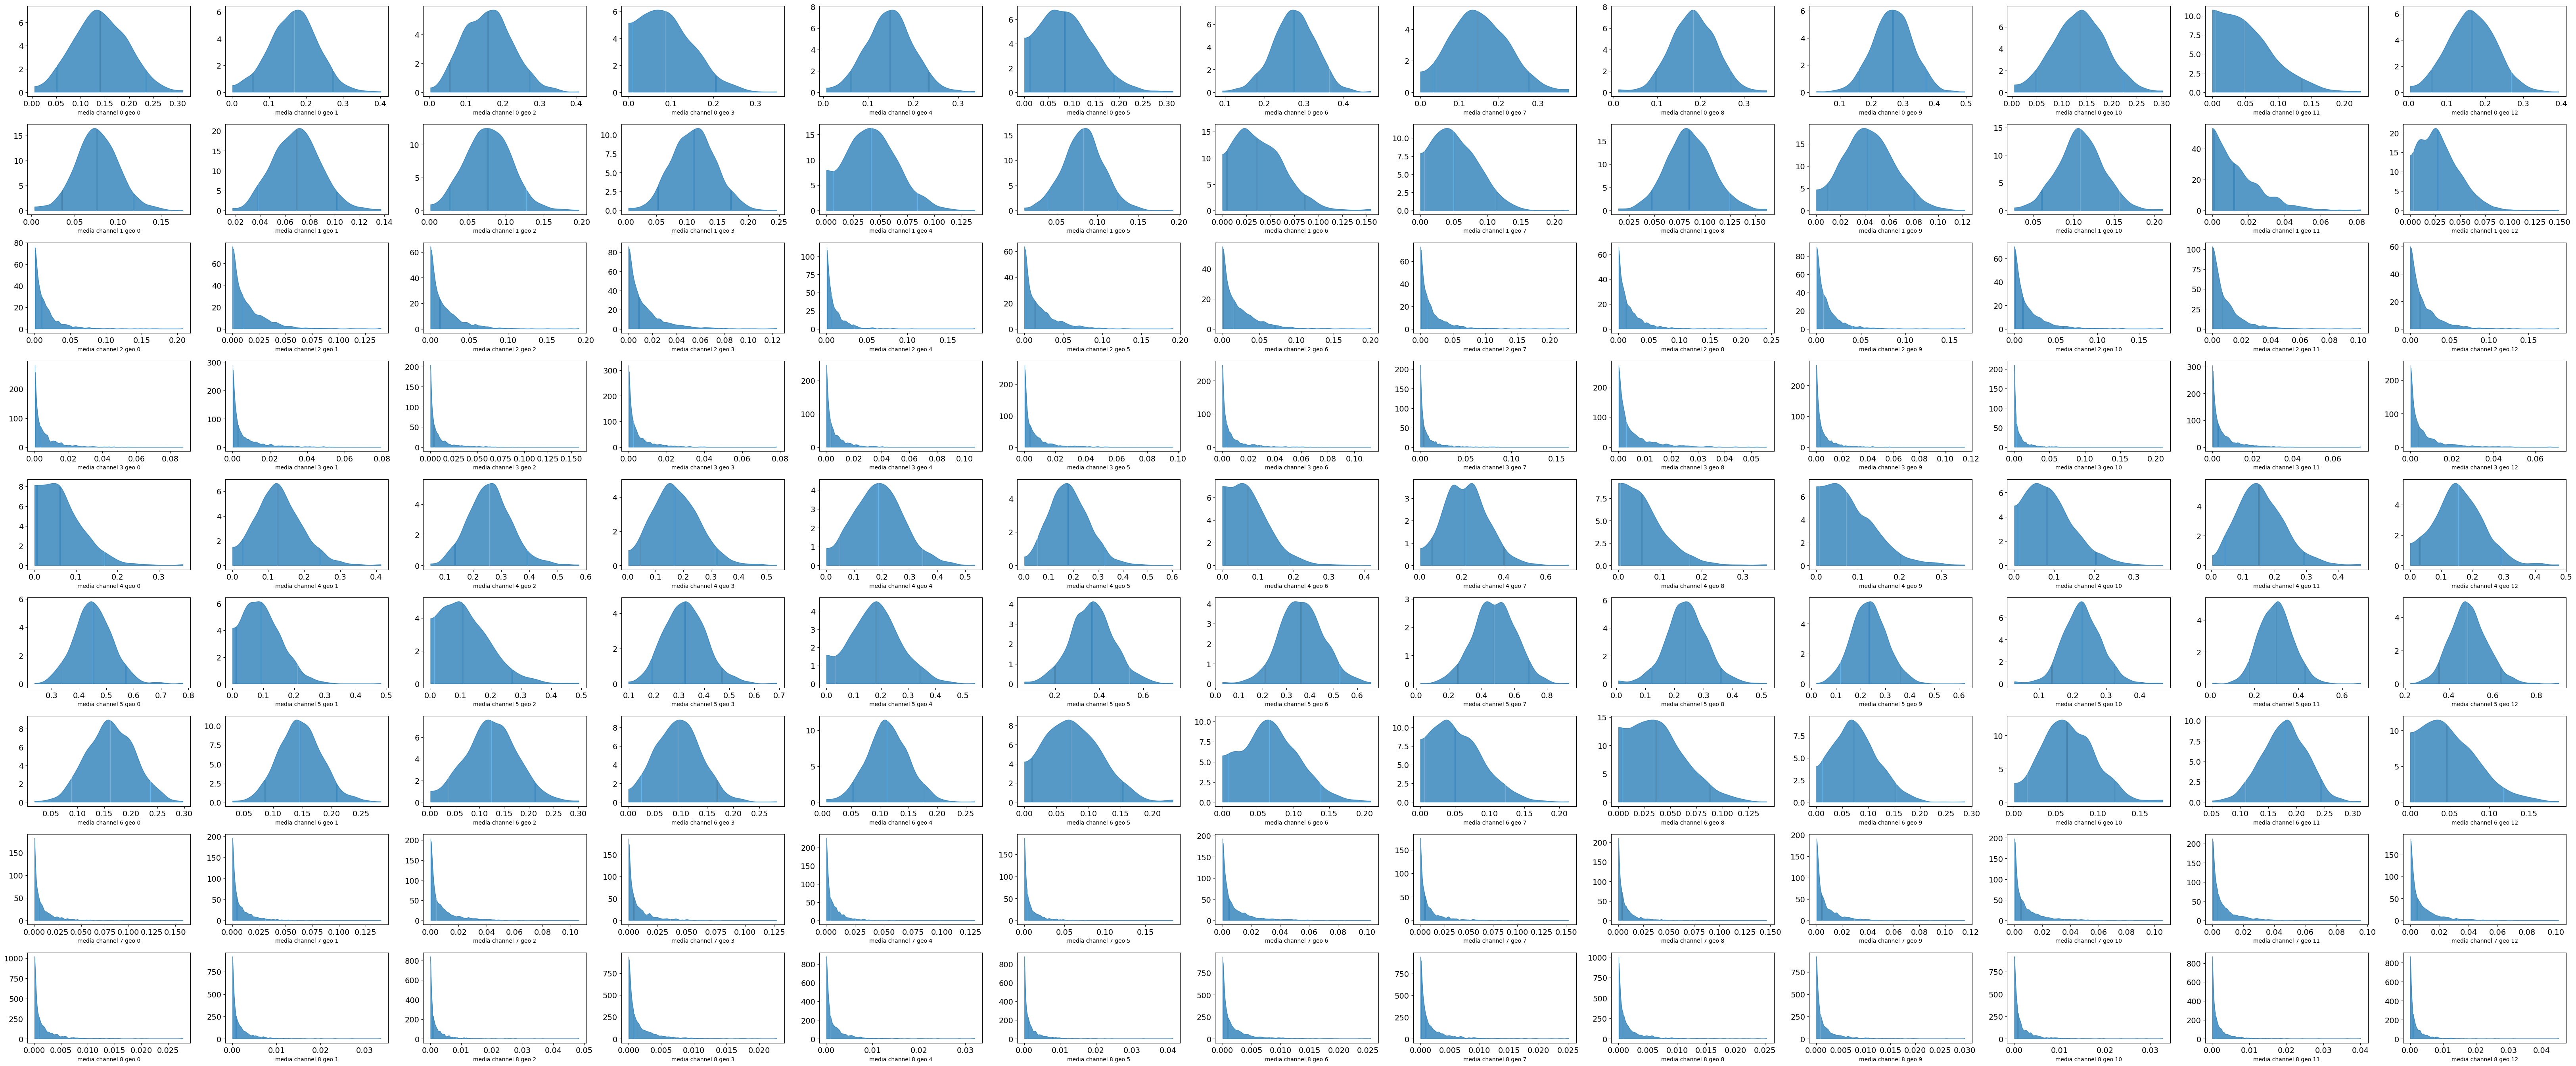

In [844]:

plot.plot_media_channel_posteriors(media_mix_model=mmm)

## Optional

LightweightMMM also allows you to visualize the prior and posterior distributions for every model parameter at once. Note that we use a kernel density estimator to smooth these distributions for easier interpretability; you may need to adjust the bandwidth of the smoother depending on the shapes of your distributions. Also, this plot can take several minutes to run, especially if using geo-level models. Lowering the number_of_samples_for_prior or restricting to a subset of selected_features can speed up the runtime.

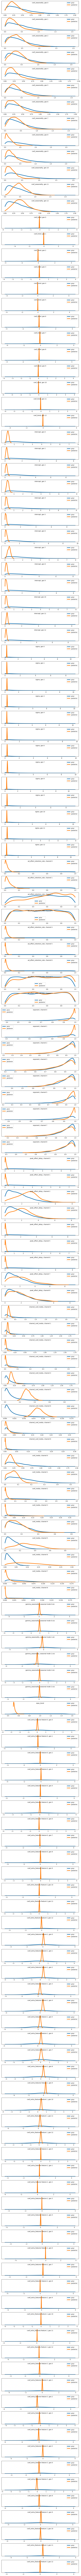

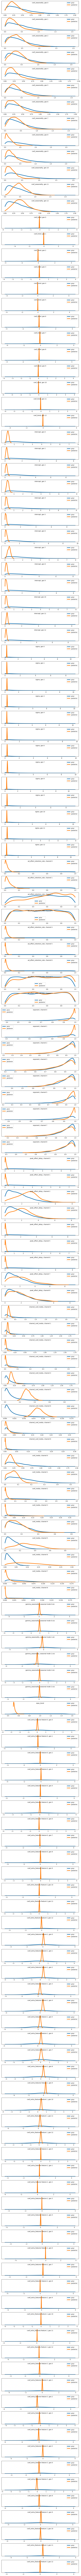

In [845]:
plot.plot_prior_and_posterior(media_mix_model=mmm)

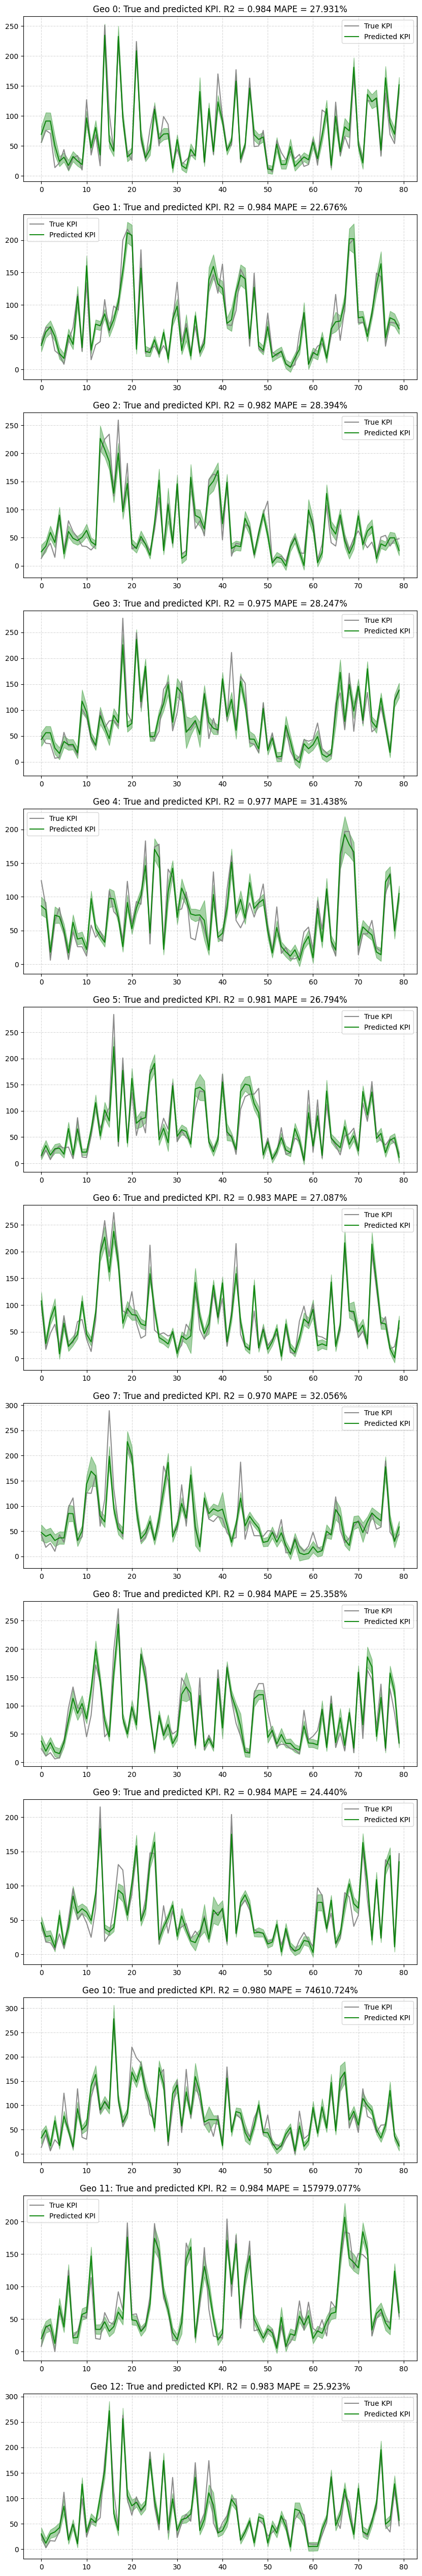

In [846]:
from lightweight_mmm import plot
plot.plot_model_fit(mmm, target_scaler = target_scaler)

## Media Contribuition Percentages 

In [847]:
media_contribution, roi_hat = mmm.get_posterior_metrics(target_scaler=target_scaler, cost_scaler=cost_scaler)

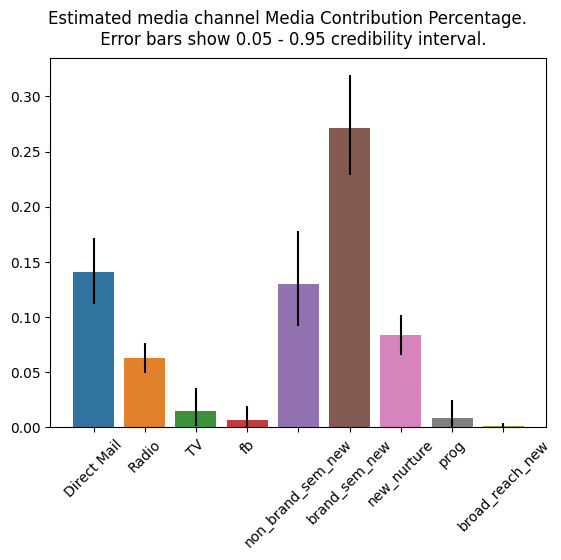

In [848]:
plot.plot_bars_media_metrics(metric=media_contribution, metric_name="Media Contribution Percentage",channel_names=ch_names)

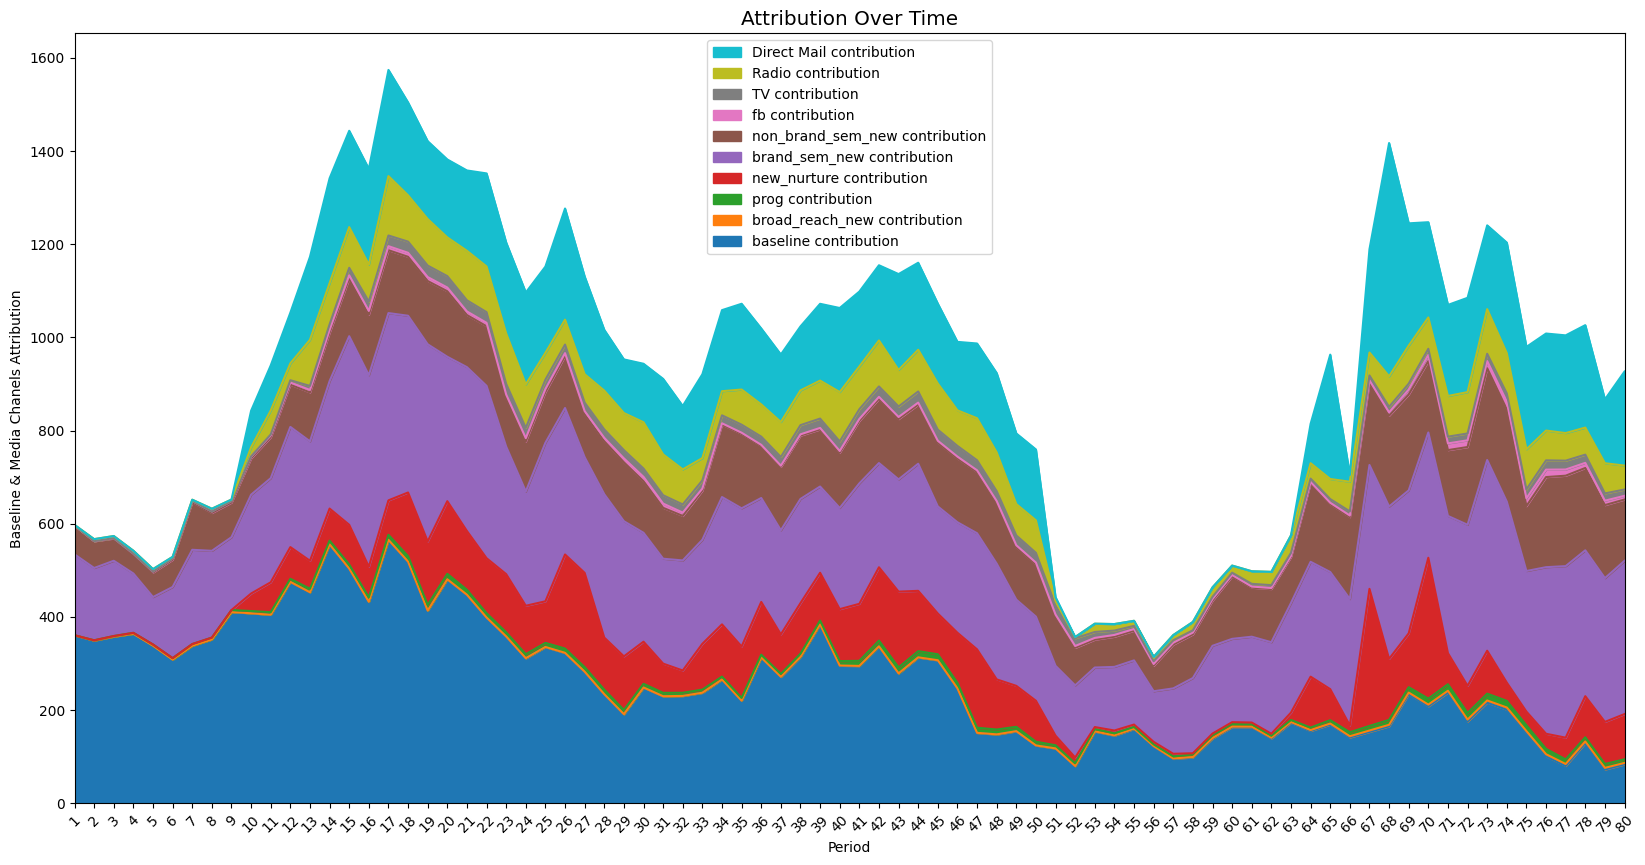

In [849]:
plot.plot_media_baseline_contribution_area_plot(media_mix_model=mmm,target_scaler = target_scaler,
                                               
                                                channel_names = ch_names,
                                                fig_size=(20,10))

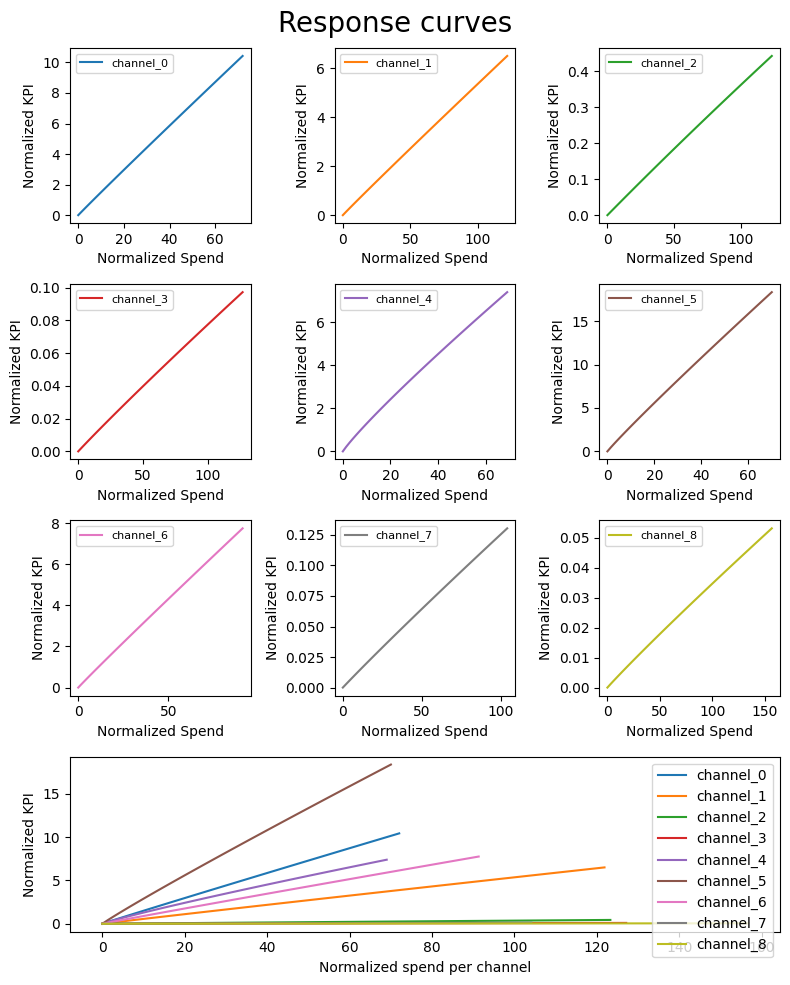

In [838]:
plot.plot_response_curves(
    media_mix_model=mmm,seed=SEED)

## Optimization ( Not Performed in this case)

In [850]:
prices = jnp.ones(mmm.n_media_channels)

In [858]:
prices

Array([1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [863]:
n_time_periods = 12
budget = jnp.sum(jnp.dot(prices, media_data.mean(axis=0)))* n_time_periods
 

In [864]:
budget

Array(4010781., dtype=float32)

In [865]:
# Run optimization with the parameters of choice.
solution, kpi_without_optim, previous_media_allocation = optimize_media.find_optimal_budgets(
    n_time_periods=n_time_periods,
    media_mix_model=mmm,
    extra_features=extra_features_scaler.transform(extra_features_test)[:n_time_periods],
    budget=budget,
    prices=prices,
    media_scaler=media_scaler,
    target_scaler=target_scaler,
    seed=SEED)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -10152.826153784745
            Iterations: 2
            Function evaluations: 38
            Gradient evaluations: 2


In [866]:
# Obtain the optimal weekly allocation.
optimal_buget_allocation = prices * solution.x
optimal_buget_allocation

Array([1345118.8  ,  495025.6  ,  595502.06 ,  255472.31 ,  576016.9  ,
        413469.78 ,   77376.11 ,  147486.17 ,  105313.414], dtype=float32)

In [867]:
# similar renormalization to get previous budget allocation
previous_budget_allocation = prices * previous_media_allocation
previous_budget_allocation

Array([1345118.8 ,  495025.62,  595502.06,  255472.34,  576016.9 ,
        413469.8 ,   77376.13,  147486.2 ,  105313.44], dtype=float32)

In [868]:
# Both these values should be very close in order to compare KPI
budget, optimal_buget_allocation.sum()

(Array(4010781., dtype=float32), Array(4010781., dtype=float32))

In [869]:
# Both numbers should be almost equal
budget, jnp.sum(solution.x * prices)

(Array(4010781., dtype=float32), Array(4010781., dtype=float32))

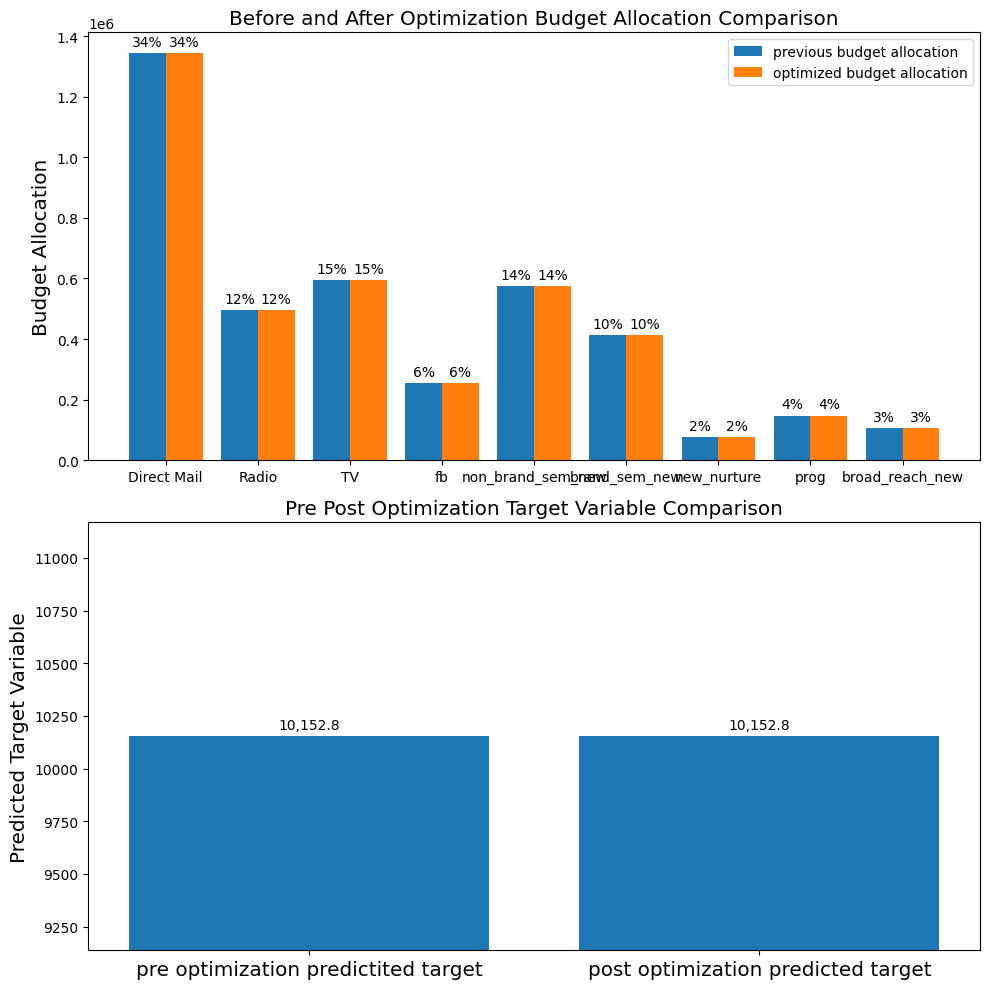

In [870]:
plot.plot_pre_post_budget_allocation_comparison(media_mix_model=mmm, 
                                                kpi_with_optim=solution['fun'], 
                                                kpi_without_optim=kpi_without_optim,
                                                optimal_buget_allocation=optimal_buget_allocation, 
                                                previous_budget_allocation=previous_budget_allocation, 
                                                figure_size=(10,10),
                                                channel_names = ch_names)